# QuicklyStart

## This is a quick start guide to show users what [mdapy](https://github.com/mushroomfire/mdapy) can do and how it should be implemented, for more specific information check out the [API](https://mdapy.readthedocs.io/en/latest/modules.html) in the documentation.

### Import corresponding packages

In [1]:
import mdapy as mp
import numpy as np
import os
mp.init() # Run on CPU

[Taichi] version 1.5.0, llvm 15.0.1, commit 7b885c28, win, python 3.8.15
[Taichi] Starting on arch=x64


In [2]:
mp.__version__

'0.8.4'

### Generate a <font color=#008000>System</font> class from a dump file, which can be found in example folder and come from the Supplementary materials of [this paper](https://doi.org/10.1038/s41467-021-25264-5).

In [3]:
system = mp.System('../../../example/CoCuFeNiPd-4M.dump')

### Check the data of <font color=#008000>System</font>.

In [4]:
system.data.head()

,id,type,x,y,z
0,1,2,0.006118,-0.310917,-0.345241
1,2,4,1.901900,-0.292456,1.484880
2,3,3,-0.015641,1.584320,1.431290
3,4,5,1.862370,1.511170,-0.372278
4,5,5,3.792570,-0.331891,-0.375830


### Calculate the average entropy fingerprint.

In [5]:
system.cal_atomic_entropy(rc=3.6*1.4, sigma=0.2, compute_average=True, average_rc=3.6*0.9)

### Calculate the CSP.

In [6]:
system.cal_centro_symmetry_parameter()

### Calculate the CNA pattern.

In [7]:
system.cal_common_neighbor_analysis(3.6*0.8536)

### Calculate the Voronoi volume.

In [8]:
system.cal_voronoi_volume()

### Check the calculated results.

In [9]:
system.data.head()

,id,type,x,y,z,atomic_entropy,ave_atomic_entropy,csp,cna,voronoi_volume,voronoi_number,cavity_radius
0,1,2,0.006118,-0.310917,-0.345241,-6.045966,-6.520935,0.100697,1,12.681010,15,3.675684
1,2,4,1.901900,-0.292456,1.484880,-6.694114,-6.731287,0.139544,1,12.012947,14,3.581766
2,3,3,-0.015641,1.584320,1.431290,-6.876417,-6.720050,0.094929,1,12.197214,12,3.674408
3,4,5,1.862370,1.511170,-0.372278,-7.013987,-6.996052,0.072999,1,12.900968,15,3.713117
4,5,5,3.792570,-0.331891,-0.375830,-6.732500,-6.900816,0.046358,1,12.400861,14,3.645415


### Check the cutoff distance now.

In [10]:
system.rc

5.04

### Neighbor atom index of atom 0 withing the cutoff distance.

In [11]:
system.verlet_list[0][system.verlet_list[0]>-1]

array([ 896, 8678,  897, 1009,    2, 7777,    3,    1,  110,  109, 7779,
       7885, 7782, 7785, 7778, 8677, 7776, 1012, 1010, 8683, 1008, 1007,
        902,  901,  899, 8785, 8787,  895,  894,  115,  113,  111, 7887,
       7886,  108,   10,    9,    7,    6,    5,    4, 8676, 8786, 7890])

### Corresponding distance from atom 0 to its neighbor atoms.

In [12]:
system.distance_list[0][system.verlet_list[0]>-1]

array([2.51207599, 2.57315649, 2.57907233, 2.58034816, 2.59777966,
       2.60048836, 2.60123122, 2.63508509, 2.63799722, 2.64905416,
       2.72325674, 2.75477768, 4.61796939, 4.39168451, 4.72094208,
       4.56321812, 3.89905069, 4.59982507, 4.55429545, 4.32684219,
       4.3158718 , 5.02072069, 4.39625655, 4.94515661, 4.54723002,
       4.35033004, 4.48415851, 4.33703698, 3.40006632, 4.52692755,
       4.59187976, 4.58003255, 4.66010003, 4.75302553, 3.73204205,
       4.42655427, 3.47691914, 4.43249288, 3.67048701, 4.59684361,
       3.78663373, 4.28528359, 4.63487321, 4.59095276])

### Validate the distance between atom 0 and atom 896.

In [14]:
system.atom_distance(0, 896)

2.5120753608164983

### Save the results to the disk.

In [15]:
system.write_dump()

### Do the spatial binning of entropy along xy plane.

In [16]:
system.spatial_binning('xy', 'ave_atomic_entropy', 4.)

### Binning coordinations.

In [17]:
system.Binning.coor

{'x': array([-0.289603,  3.710397,  7.710397, 11.710397, 15.710397, 19.710397,
        23.710397, 27.710397, 31.710397, 35.710397, 39.710397, 43.710397]),
 'y': array([-0.559109,  3.440891,  7.440891, 11.440891, 15.440891, 19.440891,
        23.440891, 27.440891, 31.440891, 35.440891, 39.440891, 43.440891])}

### Plot the binning results.

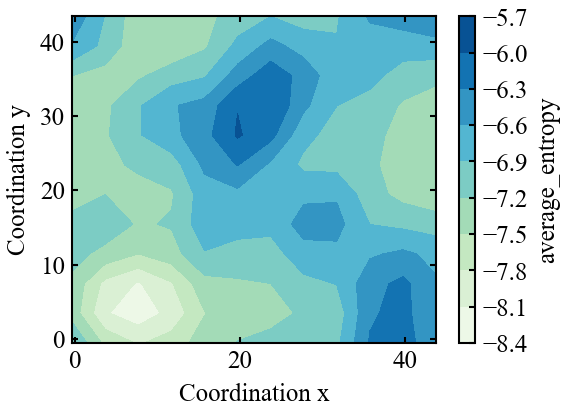

In [18]:
fig, ax = system.Binning.plot(bar_label='average_entropy')

### Calculate the WCP to reveal the short-range order in alloy.

In [19]:
system.cal_warren_cowley_parameter()

### Results show high SRO degree.

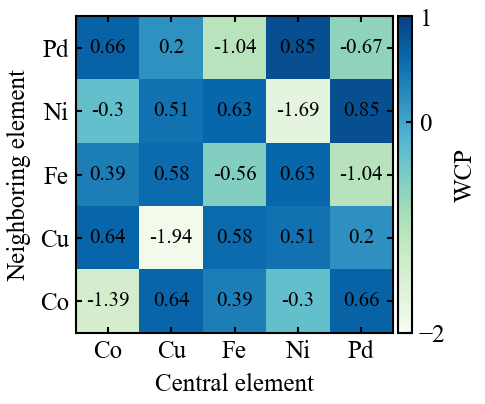

In [20]:
fig, ax = system.WarrenCowleyParameter.plot(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])

### Calculate the radiul distribution function (RDF).

In [21]:
system.cal_pair_distribution()

### Plot the RDF results.

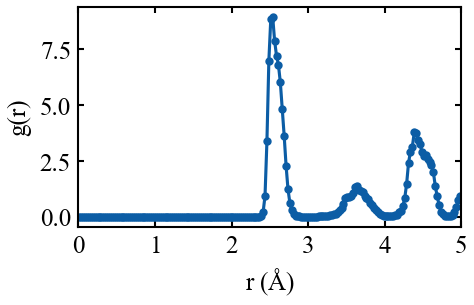

In [22]:
fig, ax = system.PairDistribution.plot()

### Plot the partial RDF results.

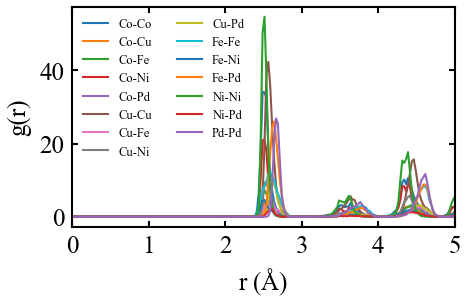

In [23]:
fig, ax = system.PairDistribution.plot_partial(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])

### One can save the figure easily.

In [24]:
fig.savefig('rdf.png', dpi=300)
os.remove('rdf.png') # Here just remove the saved figure.

### Analyze the atomic trajectories

### Generate a random walk trajectories.

In [25]:
Nframe, Nparticles = 200, 1000
pos_list = np.cumsum(
    np.random.choice([-1.0, 1.0], size=(Nframe, Nparticles, 3)), axis=0
)*np.sqrt(2)

### Calculate the mean squared displacement (MSD).

In [26]:
MSD = mp.MeanSquaredDisplacement(pos_list=pos_list, mode="windows")
MSD.compute()

### Check the MSD results.

In [27]:
MSD.msd[:10]

array([-1.06445311e-06,  5.99998935e+00,  1.19853257e+01,  1.79429824e+01,
        2.39035082e+01,  2.98774990e+01,  3.58531093e+01,  4.18232461e+01,
        4.77640708e+01,  5.37314138e+01])

### Plot the MSD results.

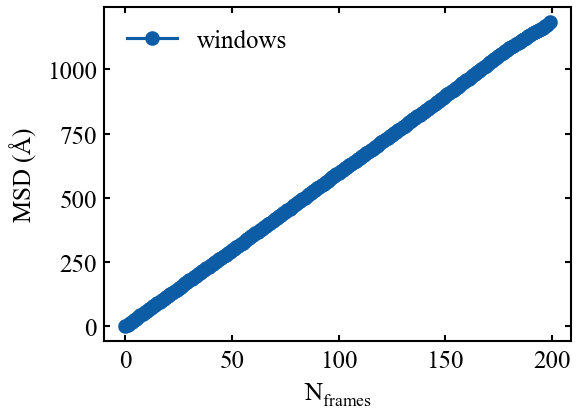

In [33]:
fig, ax = MSD.plot()

### Calculate the Lindemann index.

In [34]:
LDML = mp.LindemannParameter(pos_list)
LDML.compute()

### Plot the Lindemann index results.

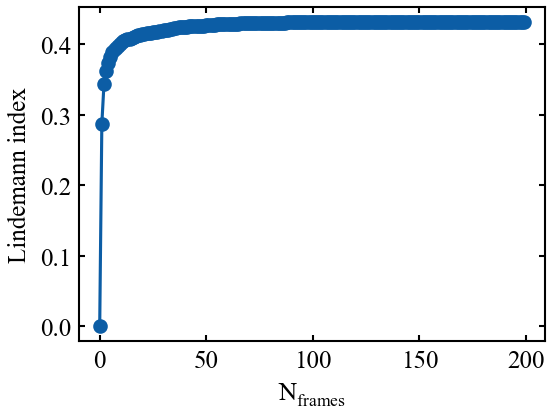

In [35]:
fig, ax = LDML.plot()

### Analyze EAM potential.

### Generate an average EAM potential is simple.

In [36]:
EAMave = mp.EAMAverage('../../../example/CoNiFeAlCu.eam.alloy', [0.2]*5)

### Read this average potential file.

In [37]:
potential = mp.EAM('./CoNiFeAlCu.average.eam.alloy')

### Plot the results. A is the virtual element.

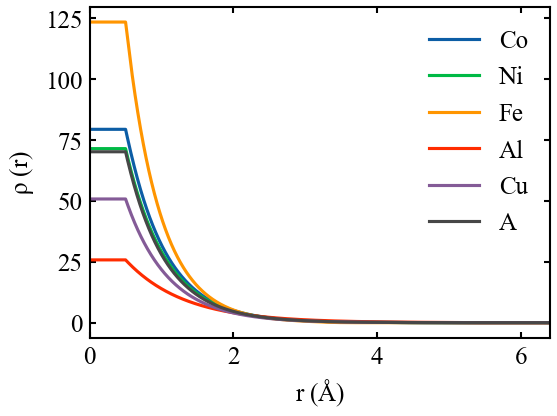

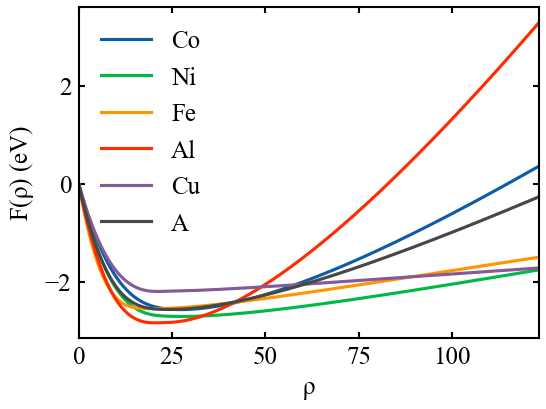

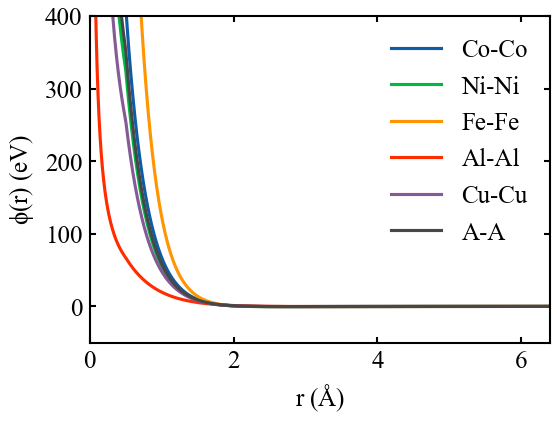

In [38]:
potential.plot()

In [39]:
os.remove('CoNiFeAlCu.average.eam.alloy') # Here just remove this average EAM file.